In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
raw_data = pd.read_csv('../data/Crop_Data.csv')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214471 entries, 0 to 214470
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   State                     214471 non-null  object 
 1   District                  214471 non-null  object 
 2   Lat                       214471 non-null  float64
 3   Long                      214471 non-null  float64
 4   GW_depth_Min              214471 non-null  float64
 5   GW_depth_Max              214471 non-null  float64
 6   Wells_depth_0_to_2        214471 non-null  int64  
 7   Wells_depth_2_to_5        214471 non-null  int64  
 8   Wells_depth_5_to_10       214471 non-null  int64  
 9   Wells_depth_10_to_20      214471 non-null  float64
 10  Wells_depth_20_to_40      214471 non-null  float64
 11  Wells_depth_40_and_above  214471 non-null  float64
 12  Precipitation             214471 non-null  float64
 13  Solar_Radiation           214471 non-null  f

In [5]:
raw_data.shape

(214471, 25)

In [6]:
raw_data.describe(include='all').T

count unique            top   freq      mean  \
State                     214471     30  UTTAR PRADESH  32311       NaN   
District                  214471    516         TUMKUR    931       NaN   
Lat                       214471    NaN            NaN    NaN   22.1603   
Long                      214471    NaN            NaN    NaN    80.514   
GW_depth_Min              214471    NaN            NaN    NaN   2.93468   
GW_depth_Max              214471    NaN            NaN    NaN   21.6015   
Wells_depth_0_to_2        214471    NaN            NaN    NaN   1.27912   
Wells_depth_2_to_5        214471    NaN            NaN    NaN   6.92002   
Wells_depth_5_to_10       214471    NaN            NaN    NaN   12.1475   
Wells_depth_10_to_20      214471    NaN            NaN    NaN   6.80312   
Wells_depth_20_to_40      214471    NaN            NaN    NaN   1.42311   
Wells_depth_40_and_above  214471    NaN            NaN    NaN  0.429346   
Precipitation             214471    NaN            NaN    NaN   100.752   
Solar_Radiation           214471    NaN            NaN    NaN   18.0258   
Surface_Pressure          214471    NaN            NaN    NaN    97.212   
Humidity                  214471    NaN            NaN    NaN   60.0893   
Temp_Max                  214471    NaN            NaN    NaN   31.1526   
Temp_Min                  214471    NaN            NaN    NaN   19.9939   
Dew_Frost_Point           214471    NaN            NaN    NaN   15.3187   
Wind_Speed                214471    NaN            NaN    NaN   2.15991   
Year                      214471    NaN            NaN    NaN   2005.52   
Season                    214471      6         Kharif  82628       NaN   
Crop                      214471    119           Rice  13084       NaN   
Area                      214471    NaN            NaN    NaN   12923.8   
Production                214471    NaN            NaN    NaN    650694   

                                  std      min      25%      50%      75%  \
State                             NaN      NaN      NaN      NaN      NaN   
District                          NaN      NaN      NaN      NaN      NaN   
Lat                           5.61227  8.08783  18.5269  23.6455  26.3305   
Long                          5.41093   69.611  76.5302  79.1647  83.5782   
GW_depth_Min                  3.07437    -0.95      1.4     2.42     3.65   
GW_depth_Max                  17.3971    -0.21    10.92    17.39    25.82   
Wells_depth_0_to_2            2.97548        0        0        0        1   
Wells_depth_2_to_5            8.01145        0        2        4       10   
Wells_depth_5_to_10           11.7203        0        3        9       17   
Wells_depth_10_to_20          8.32675        0        1        4       10   
Wells_depth_20_to_40          3.01538        0        0        0        2   
Wells_depth_40_and_above      2.48399        0        0        0        0   
Precipitation                 89.7451        0    20.14   83.732  152.714   
Solar_Radiation               2.13064     7.84   16.542   17.962    19.35   
Surface_Pressure              3.15916     63.6   95.612   97.815  99.3841   
Humidity                      16.6103   16.972   47.642   62.858   74.044   
Temp_Max                      3.77747   -5.605    28.96   31.251   33.382   
Temp_Min                      4.90569  -15.615    16.75   20.966   24.018   
Dew_Frost_Point               7.08558   -18.14   10.274   17.138    21.18   
Wind_Speed                   0.865233    0.038    1.588    2.042    2.588   
Year                          4.94274     1997     2001     2005     2010   
Season                            NaN      NaN      NaN      NaN      NaN   
Crop                              NaN      NaN      NaN      NaN      NaN   
Area                          51248.5      0.1       93      683     5100   
Production                1.81342e+07        0       94      813     7953   

                                 max  
State                            N

# EDA

In [7]:
df_v1 = raw_data.copy()

In [8]:
# Numerical columns
numerical_columns = df_v1.select_dtypes(exclude='object').columns
numerical_columns

Index(['Lat', 'Long', 'GW_depth_Min', 'GW_depth_Max', 'Wells_depth_0_to_2',
       'Wells_depth_2_to_5', 'Wells_depth_5_to_10', 'Wells_depth_10_to_20',
       'Wells_depth_20_to_40', 'Wells_depth_40_and_above', 'Precipitation',
       'Solar_Radiation', 'Surface_Pressure', 'Humidity', 'Temp_Max',
       'Temp_Min', 'Dew_Frost_Point', 'Wind_Speed', 'Year', 'Area',
       'Production'],
      dtype='object')

In [9]:
# Categorical columns
categorical_columns = df_v1.select_dtypes('object').columns
categorical_columns

Index(['State', 'District', 'Season', 'Crop'], dtype='object')

## Analyse Categorical Columns

### State

<AxesSubplot:>

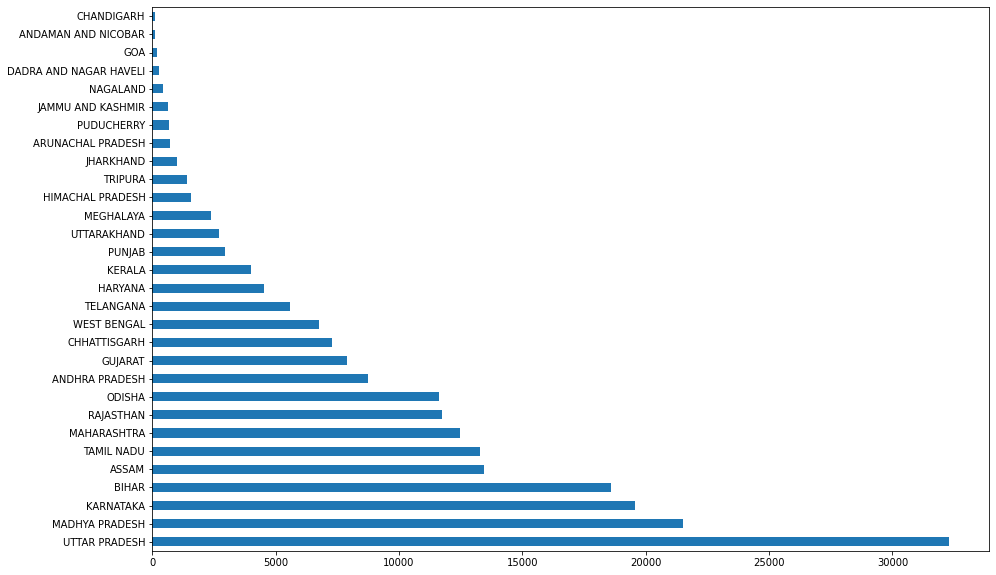

In [10]:
df_v1['State'].value_counts().plot(kind='barh', figsize=(15,10))

<AxesSubplot:ylabel='State'>

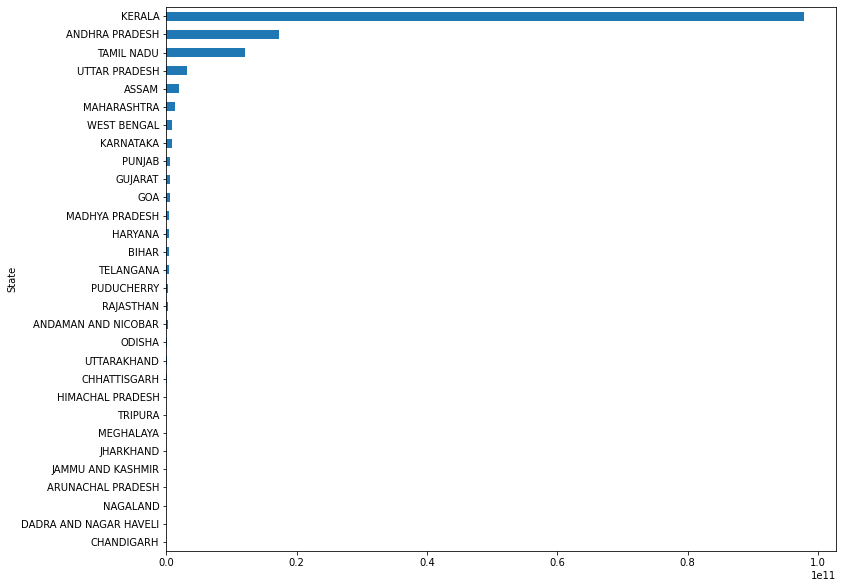

In [11]:
# State vs. Production
df_v1.groupby('State')['Production'].sum().sort_values().plot(kind='barh', figsize=(12,10))

In [12]:
df_v1.groupby('State')['Production'].sum().sort_values()

State
CHANDIGARH                6.395650e+04
DADRA AND NAGAR HAVELI    1.847871e+06
NAGALAND                  2.835020e+06
ARUNACHAL PRADESH         2.843617e+06
JAMMU AND KASHMIR         7.554460e+06
JHARKHAND                 9.470385e+06
MEGHALAYA                 1.150051e+07
TRIPURA                   1.252292e+07
HIMACHAL PRADESH          1.392536e+07
CHHATTISGARH              7.974349e+07
UTTARAKHAND               8.554936e+07
ODISHA                    1.442252e+08
ANDAMAN AND NICOBAR       2.175178e+08
RAJASTHAN                 2.718362e+08
PUDUCHERRY                2.739156e+08
TELANGANA                 3.351479e+08
BIHAR                     3.653882e+08
HARYANA                   3.812739e+08
MADHYA PRADESH            4.279194e+08
GOA                       5.057558e+08
GUJARAT                   5.059792e+08
PUNJAB                    5.650864e+08
KARNATAKA                 8.509441e+08
WEST BENGAL               8.603320e+08
MAHARASHTRA               1.263440e+09
ASSAM              

<AxesSubplot:title={'center':'Crops Production in Kerala'}, ylabel='Crop'>

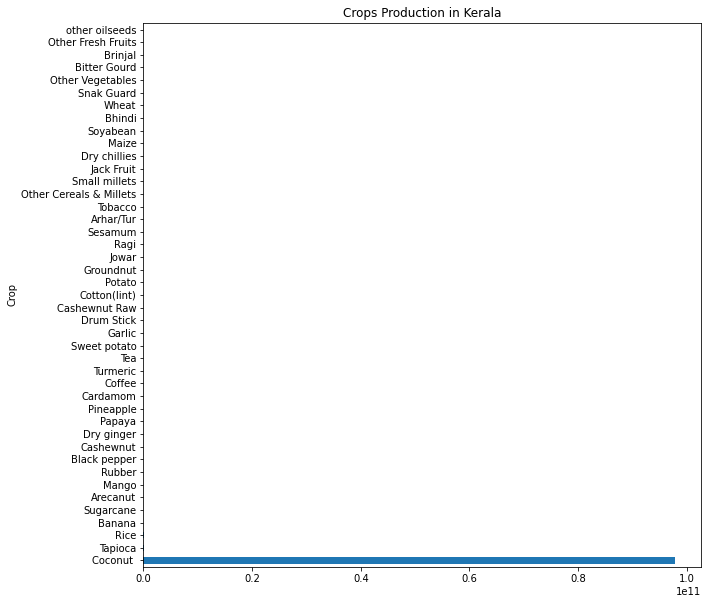

In [13]:
# Plot production of crops in Kerala
df_v1.loc[df_v1['State'] == 'KERALA'].groupby('Crop')['Production'].sum().sort_values(ascending=False).plot(kind='barh', figsize=(10, 10), title='Crops Production in Kerala')

<AxesSubplot:title={'center':'Crops Production in Kerala'}, ylabel='Crop'>

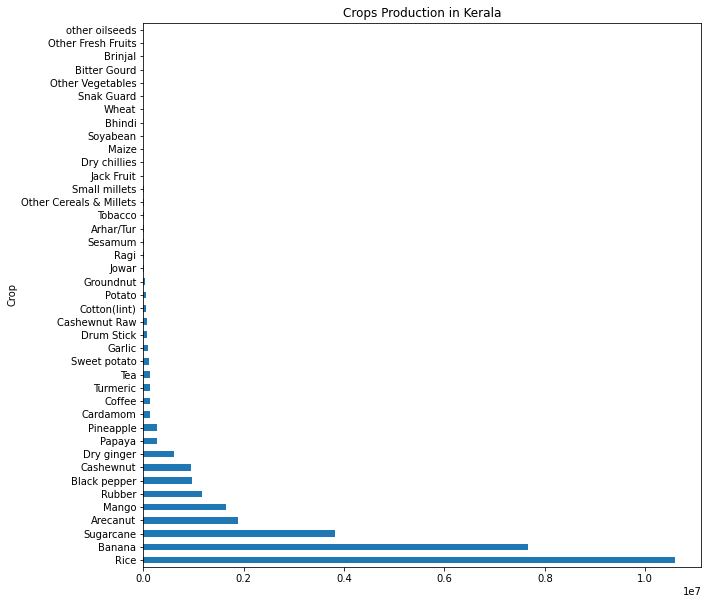

In [14]:
# Plot production of crops in Kerala (except Coconut)
df_v1.loc[df_v1['State'] == 'KERALA'].groupby('Crop')['Production'].sum().sort_values(ascending=False).iloc[2:].plot(kind='barh', figsize=(10, 10), title="Crops Production in Kerala")

From last two plots, we see that Kerala shows extremely high production due to weights of coconuts.

In [15]:
# plt.figure(figsize=(12,10))
# df_grouped_state_production = df_v1.groupby('State')['Production'].sum().sort_values(ascending=False)
# sns.barplot(x=df_grouped_state_production, y=df_grouped_state_production.index)

<AxesSubplot:ylabel='State'>

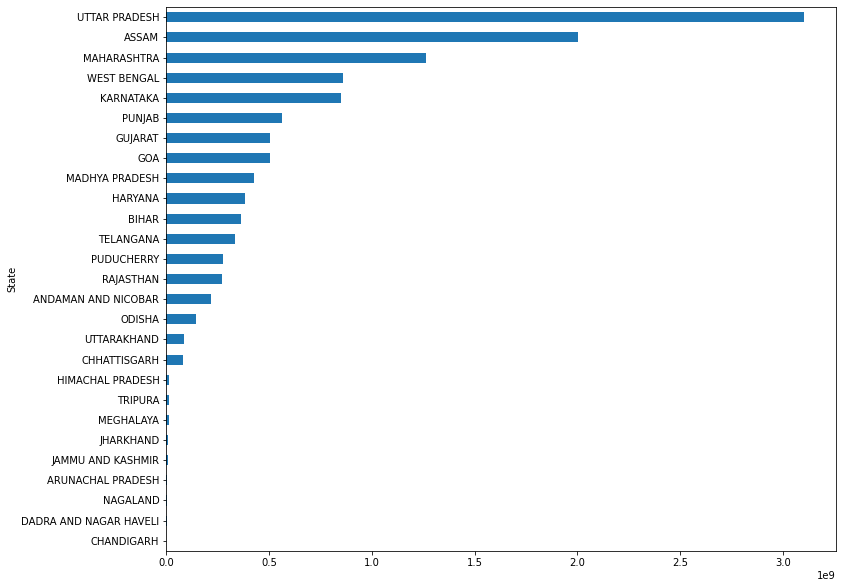

In [16]:
# State vs Production (for states excluding Kerala, Andhra Pradesh and Tamil Nadu)
df_v1.groupby('State')['Production'].sum().sort_values()[:-3].plot(kind='barh', figsize=(12,10))

### District

In [17]:
df_v1['District'].nunique()

516

In [18]:
df_v1['District'].value_counts()

TUMKUR                      931
BELGAUM                     924
HASSAN                      895
BELLARY                     887
DAVANAGERE                  881
AURANGABAD                  870
HAVERI                      867
CHAMARAJANAGAR              841
CHITRADURGA                 840
GULBARGA                    833
MYSORE                      831
KURNOOL                     824
SHIMOGA                     823
DHARWAD                     822
CHIKMAGALUR                 820
VISAKHAPATNAM               809
PRAKASAM                    802
BANGALORE RURAL             790
ANANTAPUR                   784
CHITTOOR                    782
BIDAR                       781
MANDYA                      777
EAST GODAVARI               756
GADAG                       754
VIZIANAGARAM                735
BAGALKOT                    731
MEDAK                       706
BIJAPUR                     699
RAICHUR                     690
RANGA REDDY                 689
SRIKAKULAM                  684
GUNTUR  

### Season

In [19]:
df_v1['Season'].value_counts()

Kharif        82628
Rabi          58596
Whole Year    50301
Summer        13528
Winter         5199
Autumn         4219
Name: Season, dtype: int64

In [20]:
# plt.figure(figsize=(15,40))
# sns.countplot(y='Season', data=df_v1, hue='Crop')

### Crop

In [21]:
df_v1['Crop'].value_counts()[:50]

Rice                     13084
Maize                    12088
Moong(Green Gram)         9143
Urad                      8673
Groundnut                 7938
Sesamum                   7842
Sugarcane                 7023
Wheat                     6824
Arhar/Tur                 6782
Gram                      6598
Jowar                     6583
Rapeseed &Mustard         6496
Onion                     6394
Potato                    5628
Dry chillies              5601
Bajra                     5033
Sunflower                 5000
Cotton(lint)              4044
Linseed                   3943
Small millets             3810
Sweet potato              3781
Turmeric                  3668
Barley                    3636
Masoor                    3633
Peas & beans (Pulses)     3595
Ragi                      3593
Horse-gram                3298
Coriander                 3073
Castor seed               2993
Other Kharif pulses       2956
Garlic                    2955
Banana                    2810
Other  R

In [22]:
df_v1.groupby(['Crop'])['Production'].sum().sort_values()

Crop
Apple                        0.000000e+00
Litchi                       0.000000e+00
Cauliflower                  0.000000e+00
Snak Guard                   0.000000e+00
Ribed Guard                  0.000000e+00
Cucumber                     0.000000e+00
Carrot                       0.000000e+00
Lab-Lab                      0.000000e+00
Plums                        0.000000e+00
Peas  (vegetable)            0.000000e+00
Bottle Gourd                 0.000000e+00
Peach                        0.000000e+00
Bitter Gourd                 0.000000e+00
Pear                         0.000000e+00
Ber                          0.000000e+00
Beet Root                    0.000000e+00
Pump Kin                     0.000000e+00
Turnip                       0.000000e+00
Water Melon                  0.000000e+00
Other Dry Fruit              0.000000e+00
Ash Gourd                    0.000000e+00
Yam                          0.000000e+00
other fibres                 0.000000e+00
Redish                       

**Action** - There are crops for which production is always zero. We need to remove them as they convey no relevant information.

In [23]:
with open('./crop_season_clusterer_6.pkl', 'rb') as f:
    crop_season_clusterer = pickle.load(f)

In [24]:
df_v2 = df_v1.copy()

In [25]:
# Method to remove crops with zero production
def remove_zero_production_crops(df):
    '''
    Method to remove crops with zero production
    
    Parameters:
    df - Dataframe which should have 'Crop' and 'Production' columns.
    '''
    crop_net_production = df.groupby('Crop')['Production'].sum().sort_values()
    crops_with_zero_production = crop_net_production.loc[crop_net_production == 0].index
    df = df.loc[~df['Crop'].isin(crops_with_zero_production)].reset_index(drop=True)
    return df

# Method to remove records for 'other...' crops
def remove_other_crops(df):
    '''
    Method to remove records for 'other...' crops
    
    Parameters:
    df - Dataframe which should have 'Crop' column.
    '''
    other_crops = [crop for crop in df['Crop'].unique() if 'other' in crop.lower()]
    df = df.loc[~df['Crop'].isin(other_crops)].reset_index(drop=True)
    return df

def identify_crop_types(df, clusterer):
    '''
    Returns dataframe with column 'Crop_Type' identified from values of 'Crop' and 'Season' for each row.
    
    Parameters:
    df - Dataframe which should have 'Crop' and 'Season' columns.
    clusterer - Clustering model for Crop and Season.
    '''
    df['Crop_Type'] = clusterer.predict(pd.get_dummies(df[['Crop', 'Season']].copy()))
    
    crop_type_map = {}
    
    for i, crop_type in enumerate(df['Crop_Type'].unique()):
        crop_type_map[i] = f'C{i}'
        
    df['Crop_Type'] = df['Crop_Type'].map(crop_type_map).copy()
    return df


In [26]:
# Remove rows for crops that have overall zero production in dataset
df_v2 = remove_zero_production_crops(df_v2)

In [27]:
# Remove rows with other crops
df_v2 = remove_other_crops(df_v2)

In [28]:
# Cluster Crop and Season columns (Based on cluster analysis)
df_v2 = identify_crop_types(df_v2, crop_season_clusterer)

<AxesSubplot:xlabel='Crop_Type', ylabel='Production'>

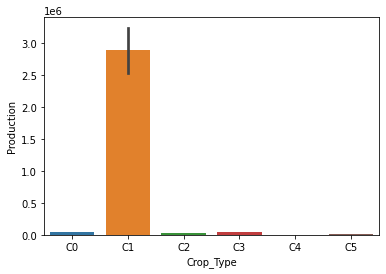

In [29]:
sns.barplot(x='Crop_Type', y='Production', data=df_v2, order=sorted(df_v2['Crop_Type'].unique()))

<AxesSubplot:xlabel='Crop_Type', ylabel='Production'>

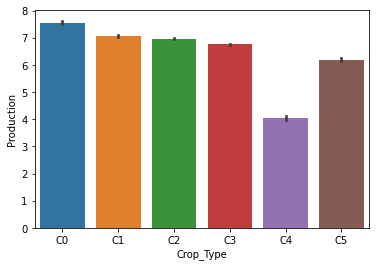

In [30]:
sns.barplot(x=df_v2['Crop_Type'], y=np.log(df_v2['Production']+1), order=sorted(df_v2['Crop_Type'].unique()))

## Analyse Numerical Columns

In [31]:
numerical_columns = df_v2.select_dtypes(exclude='object').columns
numerical_columns

Index(['Lat', 'Long', 'GW_depth_Min', 'GW_depth_Max', 'Wells_depth_0_to_2',
       'Wells_depth_2_to_5', 'Wells_depth_5_to_10', 'Wells_depth_10_to_20',
       'Wells_depth_20_to_40', 'Wells_depth_40_and_above', 'Precipitation',
       'Solar_Radiation', 'Surface_Pressure', 'Humidity', 'Temp_Max',
       'Temp_Min', 'Dew_Frost_Point', 'Wind_Speed', 'Year', 'Area',
       'Production'],
      dtype='object')

In [32]:
df_v2.describe()

Lat           Long   GW_depth_Min   GW_depth_Max  \
count  206233.000000  206233.000000  206233.000000  206233.000000   
mean       22.202291      80.580030       2.929600      21.412763   
std         5.596614       5.414102       3.061665      17.228346   
min         8.087830      69.611000      -0.950000      -0.210000   
25%        18.538250      76.552600       1.400000      10.820000   
50%        23.721350      79.386290       2.420000      17.250000   
75%        26.354380      83.755240       3.650000      25.680000   
max        33.220280      96.653480      43.950000     128.150000   

       Wells_depth_0_to_2  Wells_depth_2_to_5  Wells_depth_5_to_10  \
count       206233.000000       206233.000000        206233.000000   
mean             1.284940            6.939995            12.107039   
std              2.985637            8.031552            11.732186   
min              0.000000            0.000000             0.000000   
25%              0.000000            2.000000             3.000000   
50%              0.000000            4.000000             9.000000   
75%              1.000000           10.000000            17.000000   
max             51.000000           48.000000            67.000000   

       Wells_depth_10_to_20  Wells_depth_20_to_40  Wells_depth_40_and_above  \
count         206233.000000         206233.000000             206233.000000   
mean               6.738536              1.402078                  0.415287   
std                8.312659              2.993302                  2.438793   
min                0.000000              0.000000                  0.000000   
25%                1.000000              0.000000                  0.000000   
50%                4.000000              0.000000                  0.000000   
75%               10.000000              1.000000                  0.000000   
max               77.000000             24.000000                 38.000000   

       Precipitation  Solar_Radiation  Surface_Pressure       Humidity  \
count  206233.000000    206233.000000     206233.000000  206233.000000   
mean      101.051250        18.025924         97.227927      60.110643   
std        89.531923         2.144363          3.129573      16.581166   
min         0.000000         7.840000         63.600000      16.972000   
25%        20.510000        16.532000         95.627500      47.714000   
50%        84.380000        17.945833         97.836667      62.832000   
75%       152.868000        19.349167         99.382000      74.044000   
max       735.310000        26.312500        101.570000      91.464000   

            Temp_Max       Temp_Min  Dew_Frost_Point     Wind_Speed  \
count  206233.000000  206233.000000    206233.000000  206233.000000   
mean       31.166476      20.011514        15.340418       2.153825   
std         3.782485       4.896309         7.052623       0.862958   
min        -5.605000     -15.615000       -18.140000       0.038000   
25%        28.956000      16.845000        10.316000       1.586000   
50%        31.263000      20.966000        17.123000       2.038000   
75%        33.382000      24.038000        21.178000       2.583000   
max        42.600000      28.874000        26.014000       6.018000   

                Year          Area    Production  
count  206233.000000  2.062330e+05  2.062330e+05  
mean     2005.561084  1.333177e+04  6.766115e+05  
std         4.960932  5.219153e+04  1.849236e+07  
min      1997.000000  1.000000e-01  0.000000e+00  
25%      2001.000000  9.500000e+01  1.000000e+02  
50%      2006.000000  7.000000e+02  9.000000e+02  
75%      2010.000000  5.389000e+03  8.670000e+03  
max      2015.000000  8.580100e+06  1.250800e+09

### Production

<AxesSubplot:xlabel='Production'>

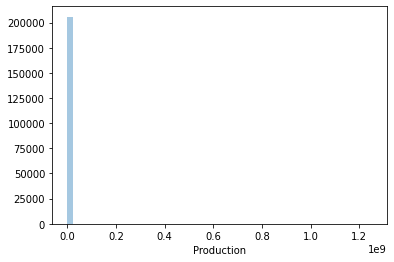

In [33]:
sns.distplot(df_v2['Production'], kde=False)

We see that Production column has exponential distribution

In [34]:
df_v3 = df_v2.copy()

In [35]:
df_v3['log_production'] = np.log(df_v3['Production'].loc[:] + 1)

<AxesSubplot:xlabel='log_production'>

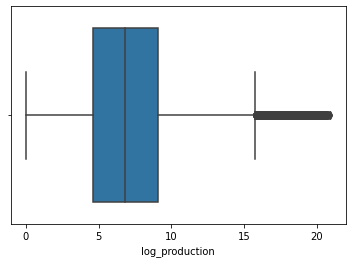

In [36]:
sns.boxplot(x='log_production', data=df_v3)

<AxesSubplot:xlabel='log_production', ylabel='Density'>

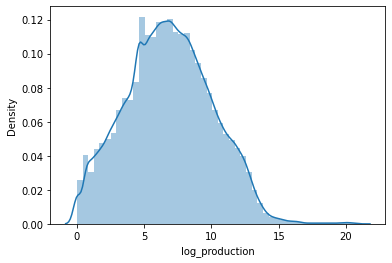

In [37]:
sns.distplot(df_v3['log_production'])

In [38]:
df_v3['log_production'].quantile(0.995)

15.055552896715003

In [39]:
# Removing outliers using 99.5% quantile
df_v3 = df_v3.loc[df_v3['log_production'] < df_v3['log_production'].quantile(0.995)]

<AxesSubplot:xlabel='log_production'>

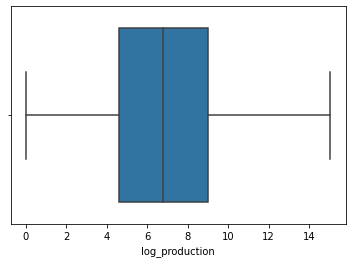

In [40]:
sns.boxplot(x='log_production', data=df_v3)

<AxesSubplot:xlabel='log_production', ylabel='Density'>

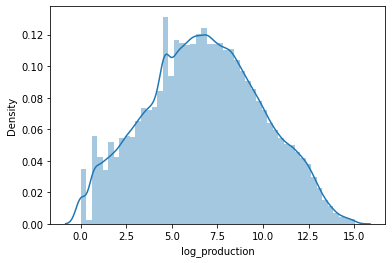

In [41]:
sns.distplot(df_v3['log_production'])

We see perfect bell curve i.e. normal distribution.

### Lat and Long

<AxesSubplot:xlabel='Long', ylabel='Lat'>

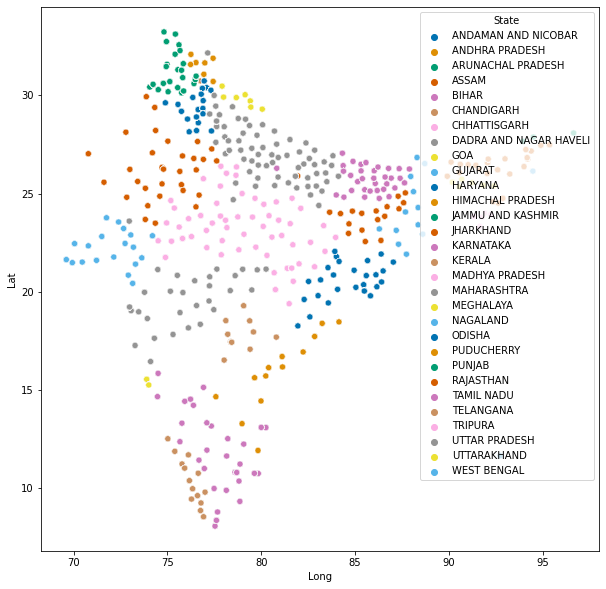

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Long', y='Lat', data=df_v3, hue='State', palette='colorblind')

<AxesSubplot:xlabel='Long', ylabel='Lat'>

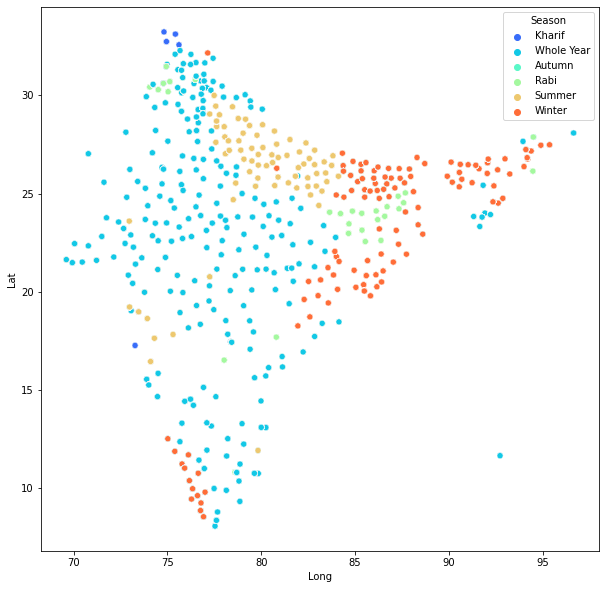

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Long', y='Lat', data=df_v3, hue='Season', palette='rainbow')

Based on cluster analysis, we found optimal number of geographical clusters can be one of 3, 5 or 6.

In [44]:
def identify_geo_region(df, clusterer):
    '''
    Returns dataframe with column 'Geo_Region' identified from values of 'Lat' and 'Long' for each row.
    
    Parameters:
    df - Data frame which should have 'Lat' and 'Long' columns.
    clusterer - Clustering model for Lat and Long.
    '''
    df['Geo_Region'] = clusterer.predict(df[['Lat', 'Long']])
    
    region_map = {}
    
    for i, region in enumerate(df['Geo_Region'].unique()):
        region_map[i] = f'R{i}'
        
    df['Geo_Region'] = df['Geo_Region'].map(region_map).copy()
    
    return df

#### Analyze with 3 clusters

In [45]:
with open('./latlong_custerer_3.pkl', 'rb') as f:
    latlong_clusterer = pickle.load(f)

In [46]:
df_v3 = identify_geo_region(df_v3, latlong_clusterer)

<AxesSubplot:xlabel='Geo_Region', ylabel='log_production'>

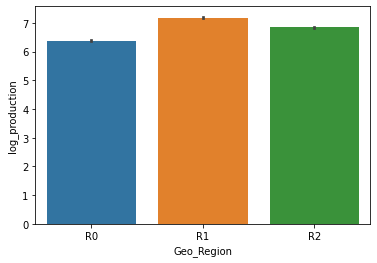

In [47]:
sns.barplot(x='Geo_Region', y='log_production', data=df_v3, order=['R0', 'R1', 'R2'])

<AxesSubplot:xlabel='Long', ylabel='Lat'>

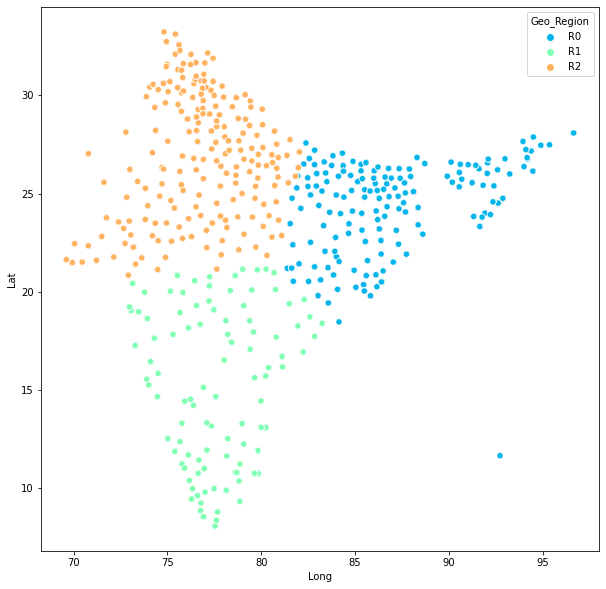

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Long', y='Lat', data=df_v3, hue='Geo_Region', palette='rainbow', hue_order=['R0', 'R1', 'R2'])

#### Analyse with 5 clusters

In [49]:
with open('./latlong_custerer_5.pkl', 'rb') as f:
    latlong_clusterer = pickle.load(f)

In [50]:
# Identify geo regions from clusters of lat and long
df_v3 = identify_geo_region(df_v3, latlong_clusterer)

<AxesSubplot:xlabel='Geo_Region', ylabel='log_production'>

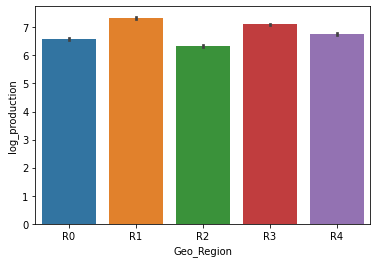

In [51]:
sns.barplot(x='Geo_Region', y='log_production', data=df_v3, order=['R0', 'R1', 'R2', 'R3', 'R4'])

<AxesSubplot:xlabel='Long', ylabel='Lat'>

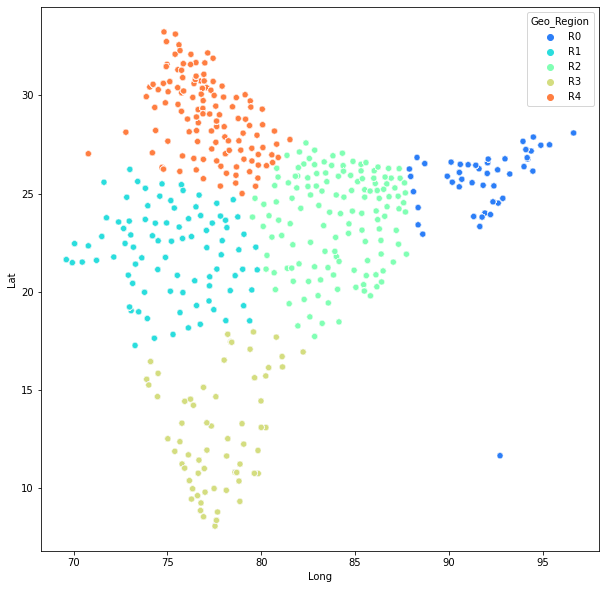

In [52]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Long', y='Lat', data=df_v3, hue='Geo_Region', palette='rainbow', hue_order=['R0', 'R1', 'R2', 'R3', 'R4'])

#### Analyze with 6 clusters

In [53]:
with open('./latlong_custerer_6.pkl', 'rb') as f:
    latlong_clusterer = pickle.load(f)

In [54]:
# Identify geo regions from clusters of lat and long
df_v3 = identify_geo_region(df_v3, latlong_clusterer)

<AxesSubplot:xlabel='Geo_Region', ylabel='log_production'>

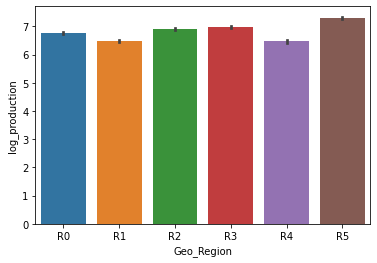

In [55]:
sns.barplot(x='Geo_Region', y='log_production', data=df_v3, order=['R0', 'R1', 'R2', 'R3', 'R4', 'R5'])

<AxesSubplot:xlabel='Long', ylabel='Lat'>

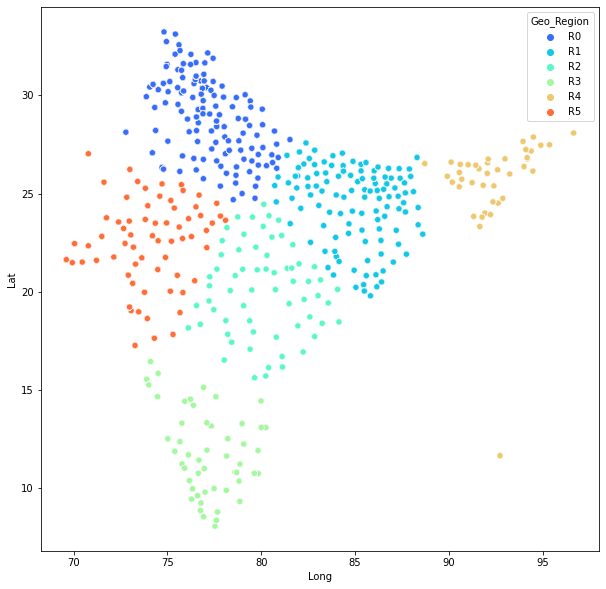

In [56]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Long', y='Lat', data=df_v3, hue='Geo_Region', palette='rainbow', hue_order=['R0', 'R1', 'R2', 'R3', 'R4', 'R5'])

In [57]:
df_v3.groupby('State')['Geo_Region'].unique()

State
ANDAMAN AND NICOBAR                   [R4]
ANDHRA PRADESH                    [R3, R2]
ARUNACHAL PRADESH                     [R4]
ASSAM                                 [R4]
BIHAR                             [R1, R0]
CHANDIGARH                            [R0]
CHHATTISGARH                      [R2, R1]
DADRA AND NAGAR HAVELI                [R0]
GOA                                   [R3]
GUJARAT                               [R5]
HARYANA                               [R0]
HIMACHAL PRADESH                      [R0]
JAMMU AND KASHMIR                     [R0]
JHARKHAND                             [R1]
KARNATAKA                             [R3]
KERALA                                [R3]
MADHYA PRADESH            [R5, R2, R0, R1]
MAHARASHTRA                   [R5, R2, R3]
MEGHALAYA                             [R4]
NAGALAND                              [R4]
ODISHA                            [R1, R2]
PUDUCHERRY                            [R3]
PUNJAB                                [R0]
RAJAS

In [58]:
# def analyse(cols, df=df_v3):
#     print(df[cols].describe())
#     print('\n')
#     if type(cols) == str:
#         sns.distplot(df[cols])
#     elif type(cols) == list:
#         for col in cols:
#             sns.distplot(df[col])
#         plt.xlabel(str(cols))
#         plt.show()
            

# def analyse_with_prod_wrt_crop_type(col, log_prod=False, df=df_v3):
#     if log_prod:
#         sns.scatterplot(x=col, y='log_production', data=df, hue='Crop_Type')
#     else:
#         sns.scatterplot(x=col, y='Production', data=df, hue='Crop_Type')
#     plt.show()
    
# def analyse_with_prod_wrt_region(col,log_prod=False, df=df_v3):
#     if log_prod:
#         sns.scatterplot(x=col, y='log_production', data=df, hue='Geo_Region')
#     else:
#         sns.scatterplot(x=col, y='Production', data=df, hue='Geo_Region')
#     plt.show()
    
    

### GW_depth_Min and GW_depth_Max

In [59]:
df_v3[['GW_depth_Min', 'GW_depth_Max']].describe()

GW_depth_Min   GW_depth_Max
count  205201.000000  205201.000000
mean        2.932364      21.421100
std         3.062878      17.236457
min        -0.950000      -0.210000
25%         1.400000      10.820000
50%         2.420000      17.250000
75%         3.650000      25.680000
max        43.950000     128.150000

<AxesSubplot:xlabel='GW_depth_Min', ylabel='Production'>

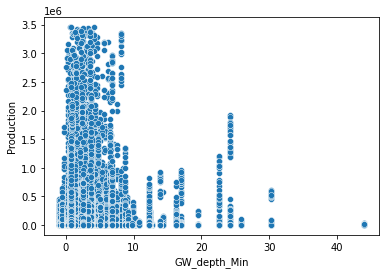

In [60]:
sns.scatterplot(x='GW_depth_Min', y='Production', data=df_v3)

<AxesSubplot:xlabel='GW_depth_Max', ylabel='Production'>

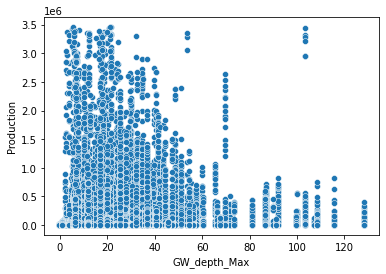

In [61]:
sns.scatterplot(x='GW_depth_Max', y='Production', data=df_v3)

<AxesSubplot:xlabel='GW_depth_Min', ylabel='GW_depth_Max'>

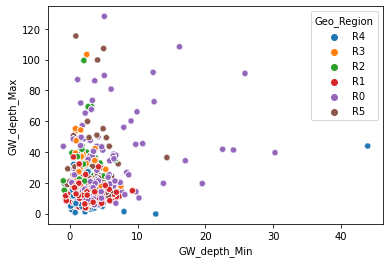

In [62]:
sns.scatterplot(x='GW_depth_Min', y='GW_depth_Max', data=df_v3, hue='Geo_Region')

### Wells

<AxesSubplot:xlabel='Wells_depth_0_to_2', ylabel='Production'>

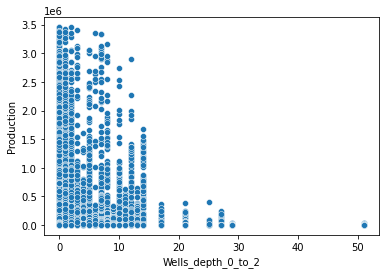

In [63]:
sns.scatterplot('Wells_depth_0_to_2', y='Production', data=df_v3)

<AxesSubplot:xlabel='Wells_depth_2_to_5', ylabel='Production'>

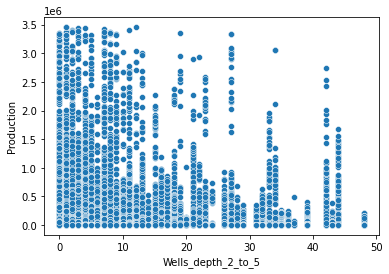

In [64]:
sns.scatterplot(x='Wells_depth_2_to_5', y='Production', data=df_v3)

<AxesSubplot:xlabel='Wells_depth_5_to_10', ylabel='Production'>

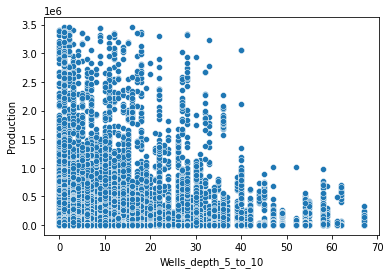

In [65]:
sns.scatterplot(x='Wells_depth_5_to_10', y='Production', data=df_v3)

<AxesSubplot:xlabel='Wells_depth_10_to_20', ylabel='Production'>

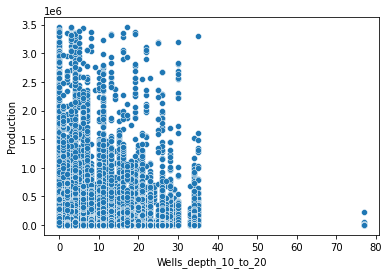

In [66]:
sns.scatterplot(x='Wells_depth_10_to_20', y='Production', data=df_v3)

<AxesSubplot:xlabel='Wells_depth_20_to_40', ylabel='Production'>

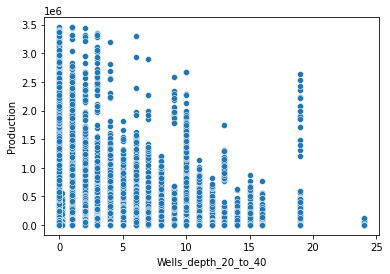

In [67]:
sns.scatterplot(x='Wells_depth_20_to_40', y='Production', data=df_v3)

<AxesSubplot:xlabel='Wells_depth_40_and_above', ylabel='Production'>

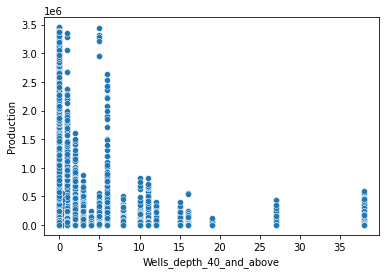

In [68]:
sns.scatterplot(x='Wells_depth_40_and_above', y='Production', data=df_v3)

In [69]:
df_v3['Total_Wells'] = df_v3[['Wells_depth_0_to_2',
       'Wells_depth_2_to_5', 'Wells_depth_5_to_10', 'Wells_depth_10_to_20',
       'Wells_depth_20_to_40', 'Wells_depth_40_and_above']].sum(axis=1)

<AxesSubplot:xlabel='Total_Wells', ylabel='log_production'>

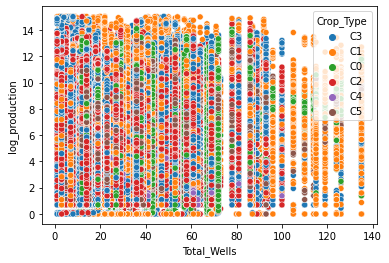

In [70]:
sns.scatterplot(x='Total_Wells', y='log_production', data=df_v3, hue='Crop_Type')

<AxesSubplot:xlabel='Total_Wells', ylabel='log_production'>

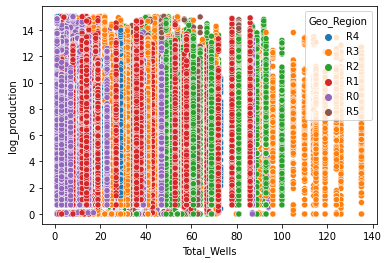

In [71]:
sns.scatterplot(x='Total_Wells', y='log_production', data=df_v3, hue='Geo_Region')

### Correlation of columns related to water

In [72]:
df_water = df_v3[['GW_depth_Min', 'GW_depth_Max',
       'Wells_depth_0_to_2', 'Wells_depth_2_to_5', 'Wells_depth_5_to_10',
       'Wells_depth_10_to_20', 'Wells_depth_20_to_40',
       'Wells_depth_40_and_above', 'Total_Wells']]

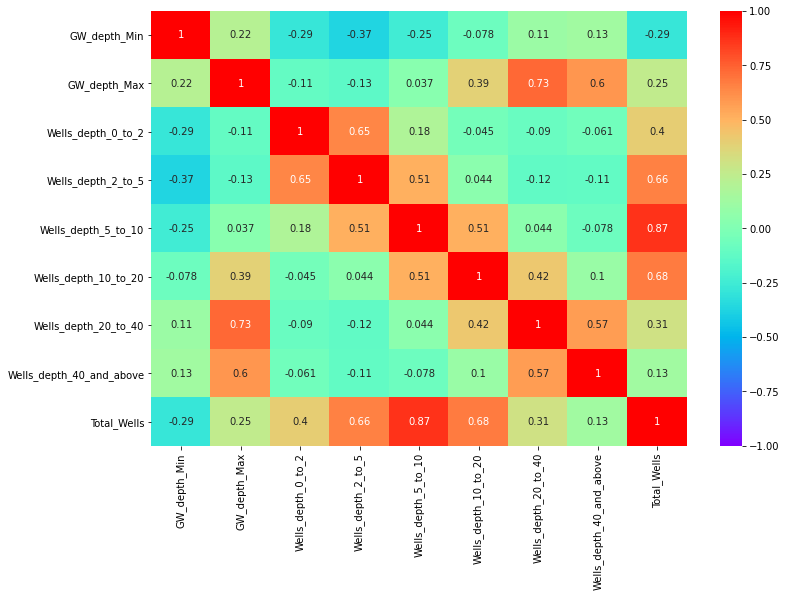

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap(df_water.corr(), annot=True, vmin=-1, vmax=1, cmap='rainbow')
plt.show()

**Observation**: Water related columns show strong sequential correlation.

### Precipitation

In [74]:
df_v3['Precipitation'].describe()

count    205201.000000
mean        100.872422
std          89.585487
min           0.000000
25%          20.344000
50%          84.096667
75%         152.661667
max         735.310000
Name: Precipitation, dtype: float64

<AxesSubplot:xlabel='Precipitation', ylabel='Density'>

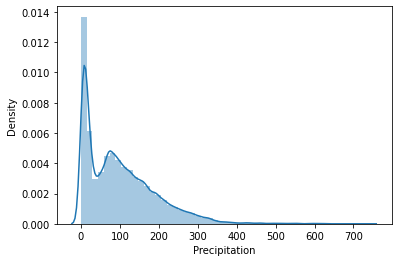

In [75]:
sns.distplot(df_v3['Precipitation'])

<AxesSubplot:xlabel='Precipitation', ylabel='Production'>

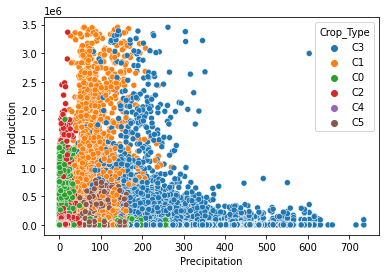

In [76]:
sns.scatterplot(x='Precipitation', y='Production', data=df_v3, hue="Crop_Type")

<AxesSubplot:xlabel='Precipitation', ylabel='log_production'>

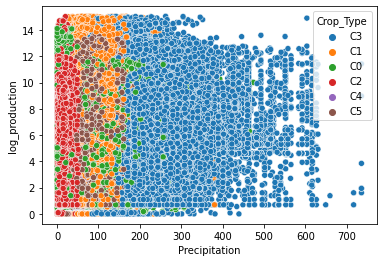

In [77]:
sns.scatterplot(x='Precipitation', y='log_production', data=df_v3, hue='Crop_Type')

### Solar Radiation

In [78]:
df_v3['Solar_Radiation'].describe()

count    205201.000000
mean         18.022590
std           2.147219
min           7.840000
25%          16.526000
50%          17.936667
75%          19.348000
max          26.312500
Name: Solar_Radiation, dtype: float64

<AxesSubplot:xlabel='Solar_Radiation', ylabel='Density'>

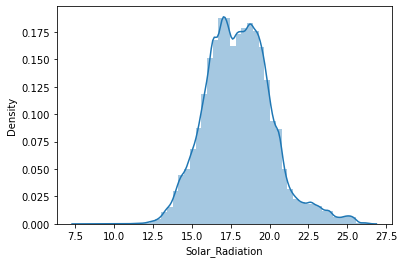

In [79]:
sns.distplot(df_v3['Solar_Radiation'])

<AxesSubplot:xlabel='Solar_Radiation', ylabel='Production'>

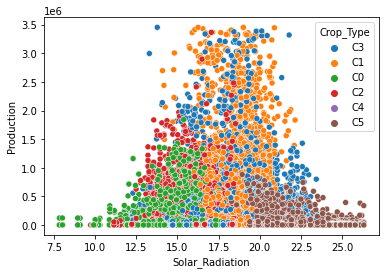

In [80]:
sns.scatterplot(x='Solar_Radiation', y='Production', data=df_v3, hue='Crop_Type')

<AxesSubplot:xlabel='Solar_Radiation', ylabel='log_production'>

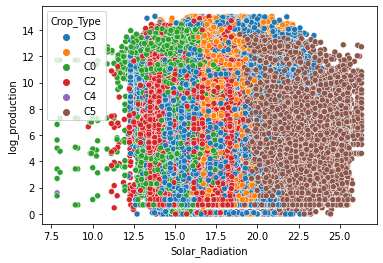

In [81]:
sns.scatterplot(x='Solar_Radiation', y='log_production', data=df_v3, hue='Crop_Type')

### Surface Pressure

In [82]:
df_v3['Surface_Pressure'].describe()

count    205201.000000
mean         97.224842
std           3.133163
min          63.600000
25%          95.626000
50%          97.832000
75%          99.380833
max         101.570000
Name: Surface_Pressure, dtype: float64

<AxesSubplot:xlabel='Surface_Pressure', ylabel='Density'>

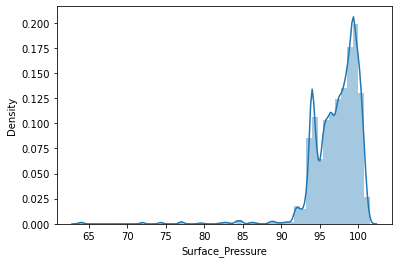

In [83]:
sns.distplot(df_v3['Surface_Pressure'])

<AxesSubplot:xlabel='Surface_Pressure', ylabel='Production'>

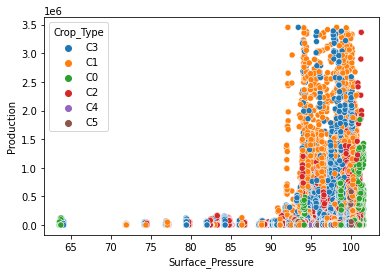

In [84]:
sns.scatterplot(x='Surface_Pressure', y='Production', data=df_v3, hue='Crop_Type')

<AxesSubplot:xlabel='Surface_Pressure', ylabel='log_production'>

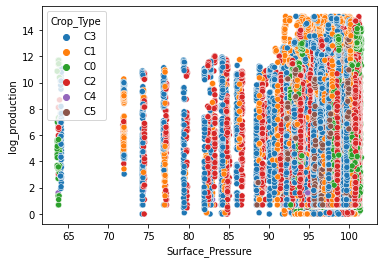

In [85]:
sns.scatterplot(x='Surface_Pressure', y='log_production', data=df_v3, hue='Crop_Type')

### Humidity

In [86]:
df_v3['Humidity'].describe()

count    205201.000000
mean         60.071387
std          16.595175
min          16.972000
25%          47.652000
50%          62.720000
75%          74.044000
max          91.464000
Name: Humidity, dtype: float64

<AxesSubplot:xlabel='Humidity', ylabel='Density'>

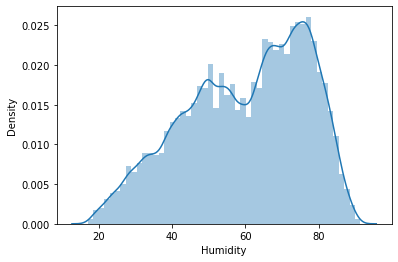

In [87]:
sns.distplot(df_v3['Humidity'])

<AxesSubplot:xlabel='Humidity', ylabel='Production'>

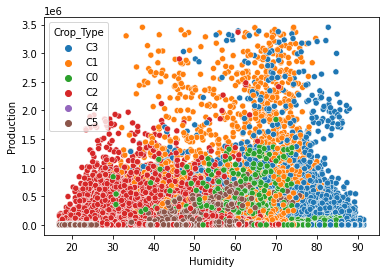

In [88]:
sns.scatterplot(x='Humidity', y='Production', data=df_v3, hue='Crop_Type')

<AxesSubplot:xlabel='Humidity', ylabel='log_production'>

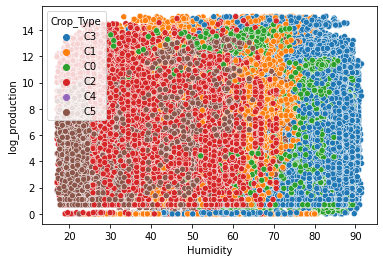

In [89]:
sns.scatterplot(x='Humidity', y='log_production', data=df_v3, hue='Crop_Type')

### Min and Max Temperature

In [90]:
df_v3[['Temp_Min', 'Temp_Max']].describe()

Temp_Min       Temp_Max
count  205201.000000  205201.000000
mean       20.001169      31.166482
std         4.902914       3.788445
min       -15.615000      -5.605000
25%        16.808000      28.956000
50%        20.966000      31.264000
75%        24.035000      33.384000
max        28.874000      42.600000

Text(0.5, 0, 'Temperature Min vs Max')

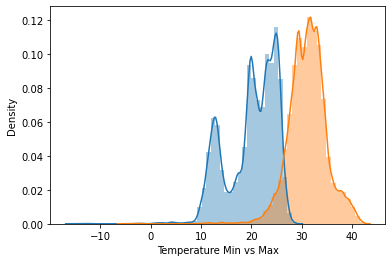

In [91]:
sns.distplot(df_v3['Temp_Min'])
sns.distplot(df_v3['Temp_Max'])
plt.xlabel('Temperature Min vs Max')

<AxesSubplot:xlabel='Temp_Min', ylabel='log_production'>

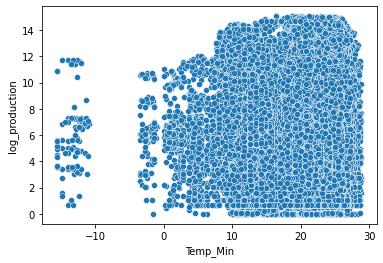

In [92]:
sns.scatterplot(x='Temp_Min', y='log_production', data=df_v3)

<AxesSubplot:xlabel='Temp_Max', ylabel='log_production'>

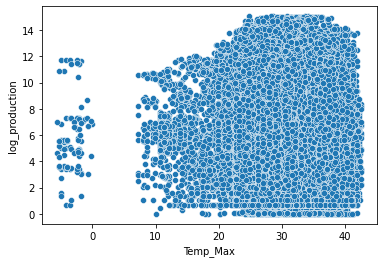

In [93]:
sns.scatterplot(x='Temp_Max', y='log_production', data=df_v3)

### Dew Frost Point

In [94]:
df_v3['Dew_Frost_Point'].describe()

count    205201.000000
mean         15.322719
std           7.060631
min         -18.140000
25%          10.292000
50%          17.097000
75%          21.174000
max          26.014000
Name: Dew_Frost_Point, dtype: float64

<AxesSubplot:xlabel='Dew_Frost_Point', ylabel='Density'>

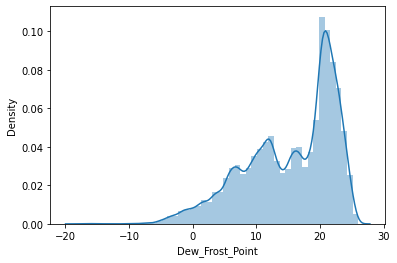

In [95]:
sns.distplot(df_v3['Dew_Frost_Point'])

<AxesSubplot:xlabel='Dew_Frost_Point', ylabel='Production'>

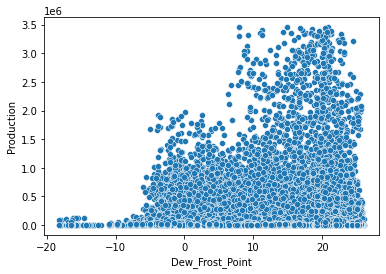

In [96]:
sns.scatterplot(x='Dew_Frost_Point', y='Production', data=df_v3)

### Wind Speed

In [97]:
df_v3['Wind_Speed'].describe()

count    205201.000000
mean          2.153494
std           0.862816
min           0.038000
25%           1.586000
50%           2.038000
75%           2.583000
max           6.018000
Name: Wind_Speed, dtype: float64

<AxesSubplot:xlabel='Wind_Speed', ylabel='Density'>

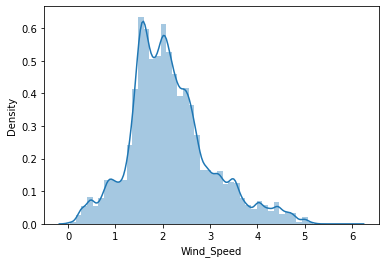

In [98]:
sns.distplot(df_v3['Wind_Speed'])

<AxesSubplot:xlabel='Wind_Speed', ylabel='Production'>

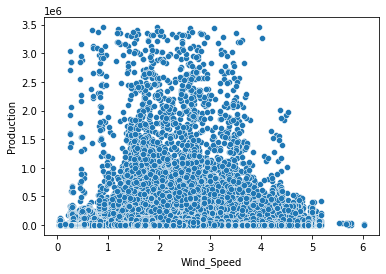

In [99]:
sns.scatterplot(x='Wind_Speed', y='Production', data=df_v3)

### Correlation in columns related to climate

As various weather conditions can be dependent, there is possibility of correlation in columns.
For example, increase in Solar_Radiation may also increase Temp_Max.

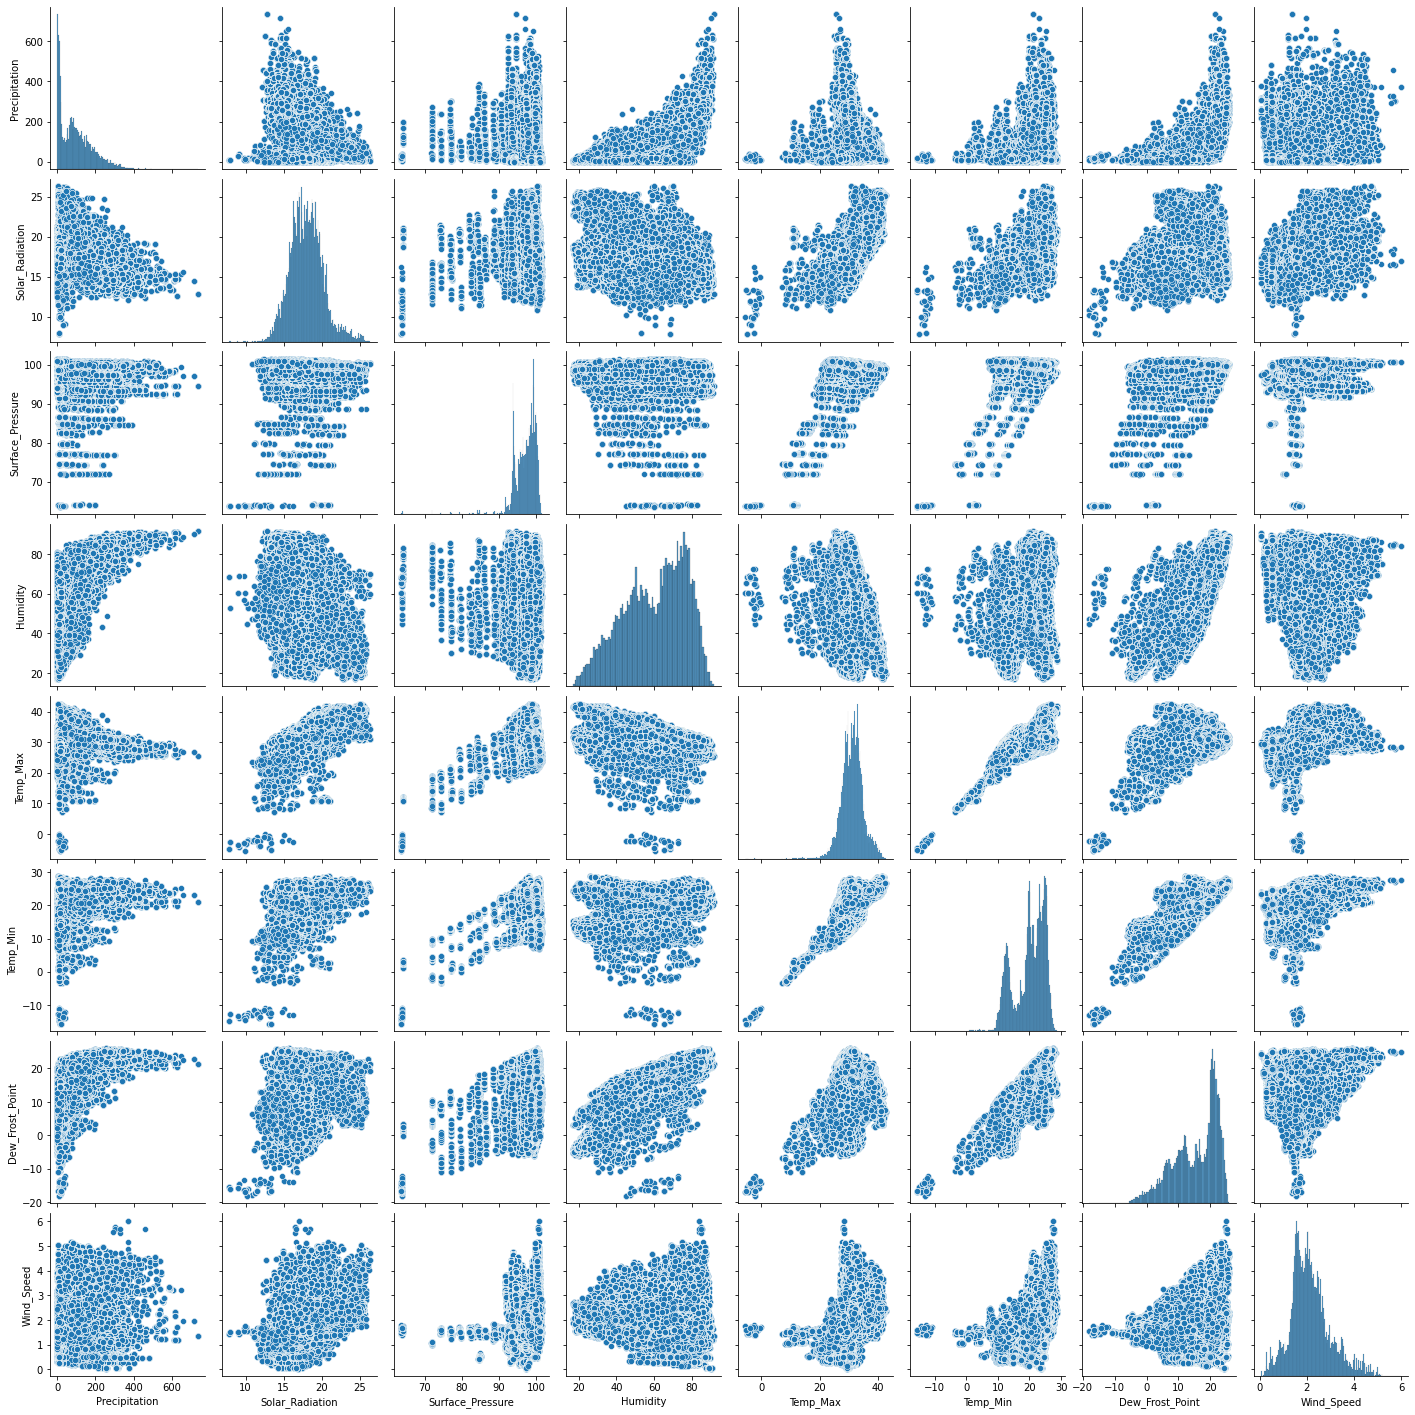

In [100]:
sns.pairplot(data=df_v3, vars=['Precipitation',
       'Solar_Radiation', 'Surface_Pressure', 'Humidity', 'Temp_Max',
       'Temp_Min', 'Dew_Frost_Point', 'Wind_Speed'])

In [101]:
df_climate = df_v3[['Precipitation', 'Solar_Radiation', 'Surface_Pressure', 'Humidity', 
    'Temp_Max', 'Temp_Min', 'Dew_Frost_Point', 'Wind_Speed']]

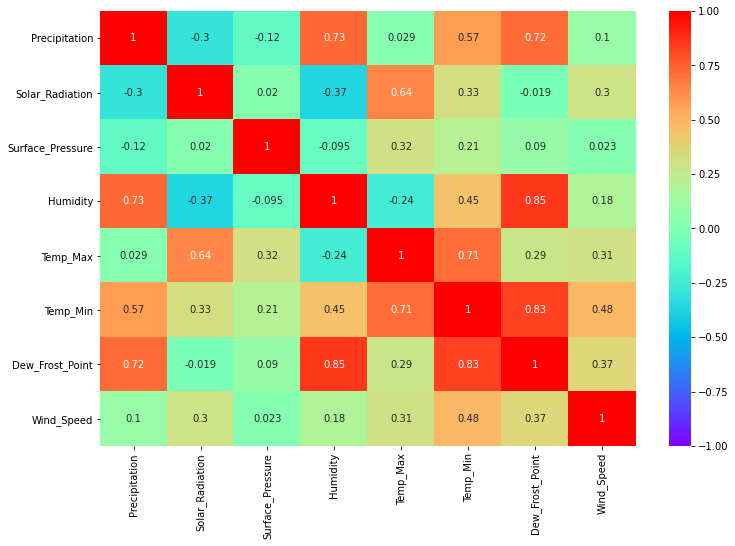

In [102]:
plt.figure(figsize=(12,8))
sns.heatmap(df_climate.corr(), annot=True, vmin=-1, vmax=1, cmap='rainbow')
plt.show()

**Observation**: Many columns based on climate conditions are highly correlated. We have take care of this during feature selection.

### Area

In [103]:
df_v3['Area'].describe()

count    2.052010e+05
mean     1.299908e+04
std      4.451360e+04
min      1.000000e-01
25%      9.400000e+01
50%      6.980000e+02
75%      5.248000e+03
max      4.094900e+06
Name: Area, dtype: float64

<AxesSubplot:xlabel='Area', ylabel='Density'>

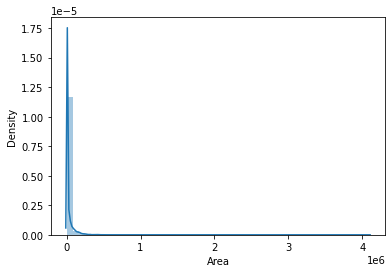

In [104]:
sns.distplot(df_v3['Area'])

<AxesSubplot:xlabel='Area', ylabel='Density'>

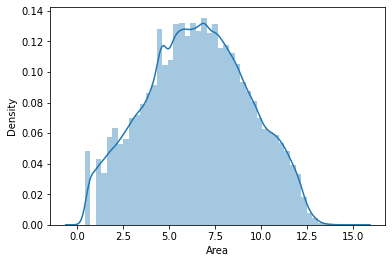

In [105]:
sns.distplot(np.log(df_v3['Area'] + 1))

<AxesSubplot:xlabel='Area', ylabel='Production'>

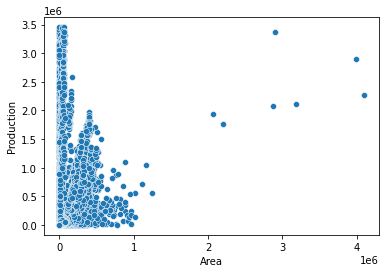

In [106]:
sns.scatterplot(x='Area', y='Production', data=df_v3)

Text(0.5, 0, 'log_Area')

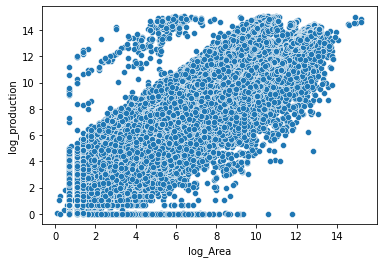

In [107]:
sns.scatterplot(x=np.log(df_v3['Area'] + 1), y=df_v3['log_production'])
plt.xlabel('log_Area')

**Observation**: Log values of area and production shows linear relationship.

## Correlation (all numerical)

In [108]:
df_v3.select_dtypes(exclude='object').columns

Index(['Lat', 'Long', 'GW_depth_Min', 'GW_depth_Max', 'Wells_depth_0_to_2',
       'Wells_depth_2_to_5', 'Wells_depth_5_to_10', 'Wells_depth_10_to_20',
       'Wells_depth_20_to_40', 'Wells_depth_40_and_above', 'Precipitation',
       'Solar_Radiation', 'Surface_Pressure', 'Humidity', 'Temp_Max',
       'Temp_Min', 'Dew_Frost_Point', 'Wind_Speed', 'Year', 'Area',
       'Production', 'log_production', 'Total_Wells'],
      dtype='object')

In [109]:
df_numerical_only = df_v3[['GW_depth_Min', 'GW_depth_Max',
       'Wells_depth_0_to_2', 'Wells_depth_2_to_5', 'Wells_depth_5_to_10',
       'Wells_depth_10_to_20', 'Wells_depth_20_to_40',
       'Wells_depth_40_and_above', 'Total_Wells', 'Precipitation', 'Solar_Radiation',
       'Surface_Pressure', 'Humidity', 'Temp_Max', 'Temp_Min',
       'Dew_Frost_Point', 'Wind_Speed', 'Area',
       'Production','log_production']]

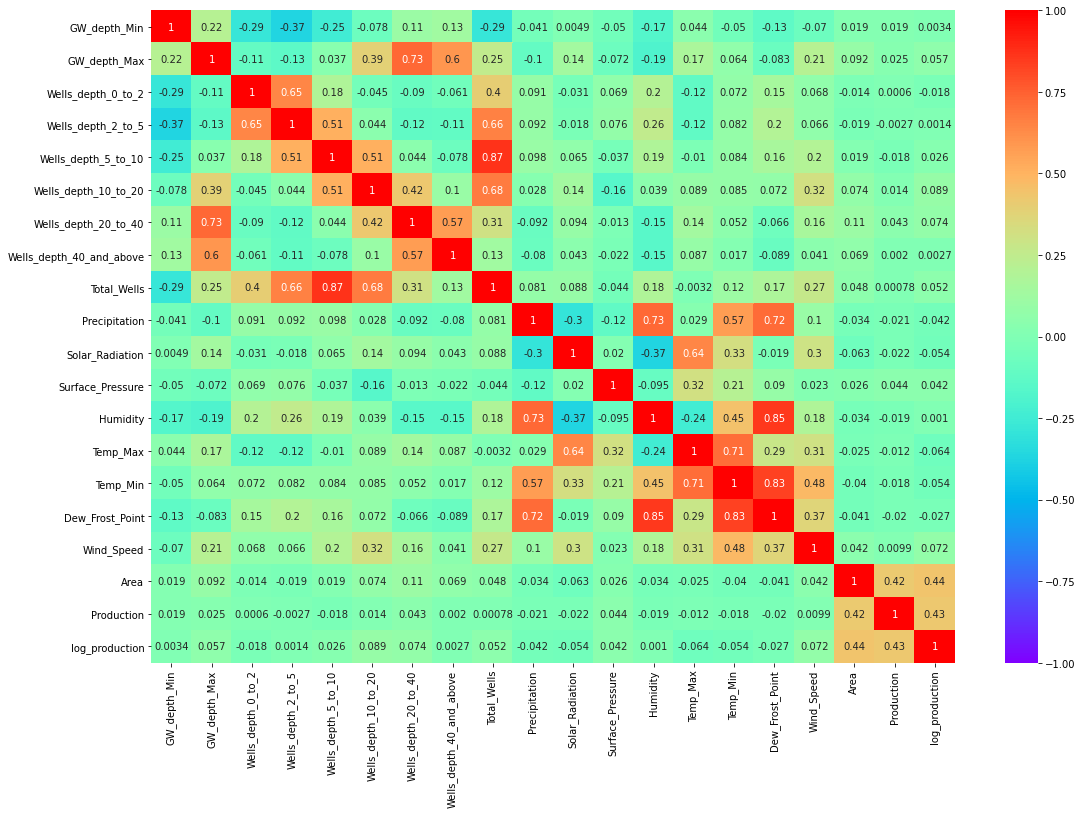

In [110]:
plt.figure(figsize=(18,12))
sns.heatmap(
    df_numerical_only.corr()
    , annot=True, vmin=-1, vmax=1, cmap='rainbow'
)
plt.show()

<AxesSubplot:xlabel='Production', ylabel='log_production'>

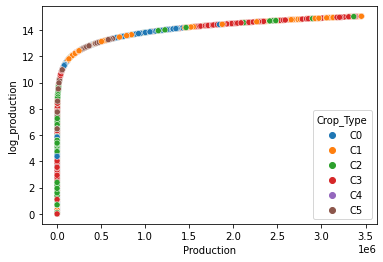

In [111]:
sns.scatterplot(x='Production', y='log_production', data=df_v3, hue='Crop_Type', hue_order=sorted(df_v3['Crop_Type'].unique()))